# Python Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from scipy import stats

data = pd.read_excel(r"C:\Users\shrey\Downloads\Global_Air_Pollution_proj.xlsx")
data.columns = data.columns.str.replace(' ', '_').str.replace(r'\W', '', regex=True)

In [2]:

print(data.head())
print(data.info())
print(data.describe())
col = 'PM25_AQI_Value'

#drop the row wiht null values
data = data.dropna(subset=['Country'])

              Country              City  AQI_Value AQI_Category  CO_AQI_Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO_AQI_Category  Ozone_AQI_Value Ozone_AQI_Category  NO2_AQI_Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2_AQI_Category  PM25_AQI_Value PM25_AQI_Category  
0             Good       

# Graph 1

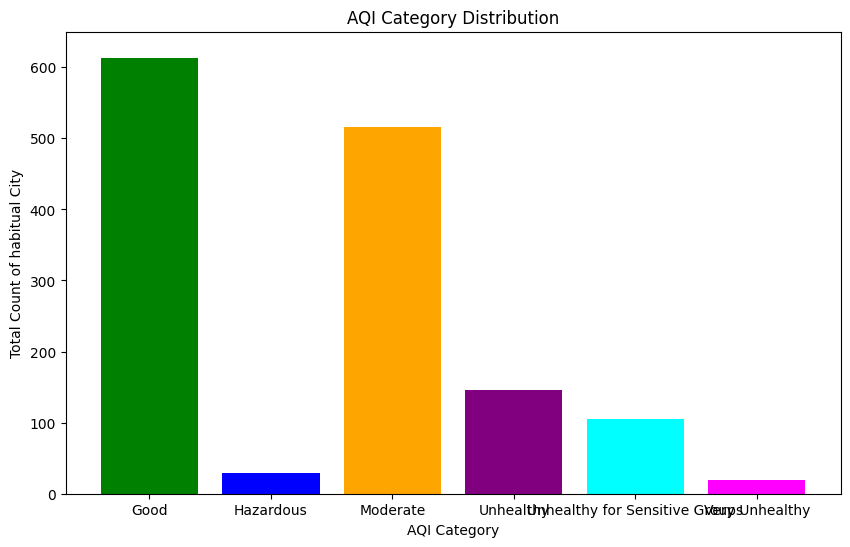

In [15]:
co_aqi_counts = data.groupby('CO_AQI_Value').size().reset_index(name='Number_of_Cities')
AQI_Category_counts = data.groupby('AQI_Category').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
colors = [ 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta'] 
bars = plt.bar(AQI_Category_counts['AQI_Category'], AQI_Category_counts['Count'], color=colors)

# Add title and labels
plt.title('AQI Category Distribution')
plt.xlabel('AQI Category')
plt.ylabel('Total Count of habitual City')
plt.ylim(0, 650)
plt.show()


# Graph2

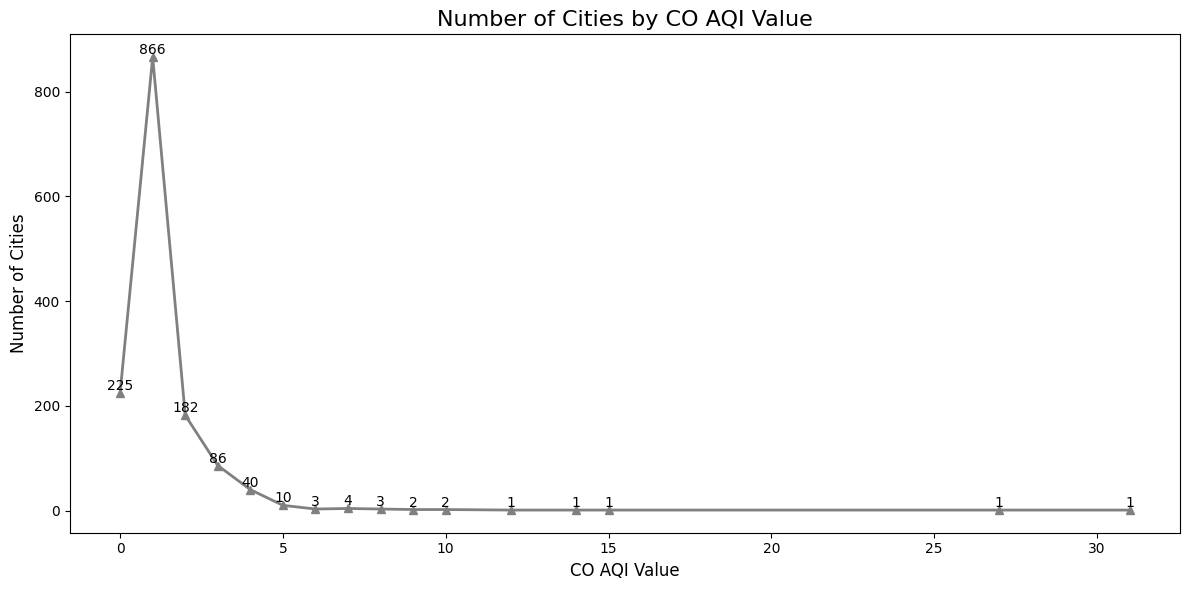

In [5]:
co_aqi_counts = data.groupby('CO_AQI_Value').size().reset_index(name='Number_of_Cities')
AQI_Category_counts = data.groupby('AQI_Category').size().reset_index(name='Count')


plt.figure(figsize=(12, 6))
plt.plot(co_aqi_counts['CO_AQI_Value'], co_aqi_counts['Number_of_Cities'],  color='gray', marker='^', markersize=6, linewidth=2)

# Add title and labels
plt.title('Number of Cities by CO AQI Value', fontsize=16)
plt.xlabel('CO AQI Value', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)

for i, row in co_aqi_counts.iterrows():
    plt.text(row['CO_AQI_Value'], row['Number_of_Cities'], 
            str(row['Number_of_Cities']), ha='center', va='bottom')

plt.tight_layout()
plt.show()



# Graph3

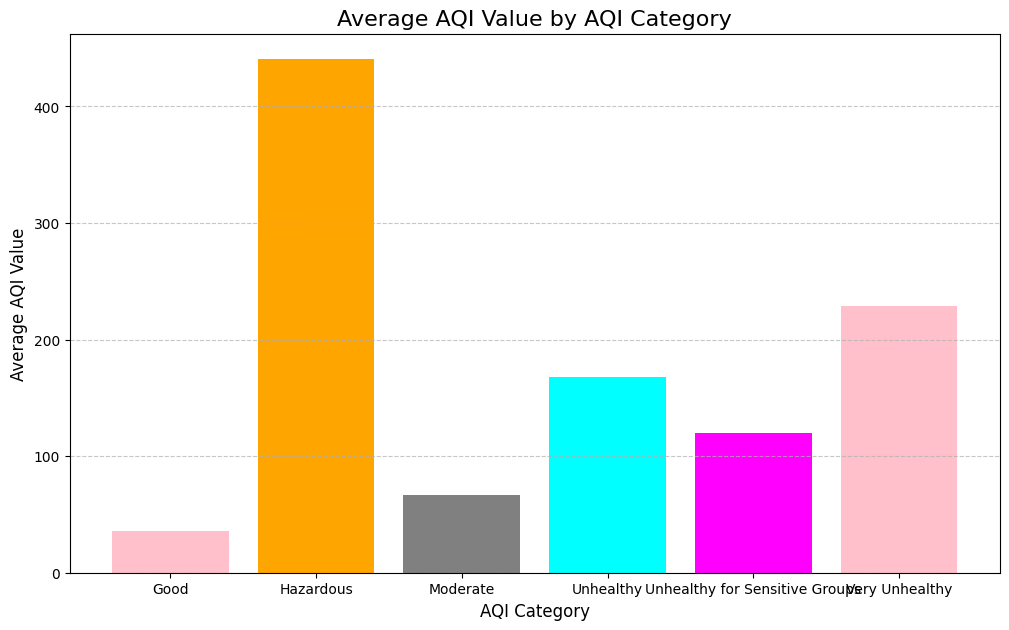

In [16]:
aqi_by_category = data.groupby('AQI_Category')['AQI_Value'].mean().reset_index()
plt.figure(figsize=(12, 7))
colors = ['pink', 'orange', 'gray', 'cyan', 'magenta']  
bars = plt.bar(aqi_by_category['AQI_Category'], aqi_by_category['AQI_Value'], color=colors)

plt.title('Average AQI Value by AQI Category', fontsize=16)
plt.xlabel('AQI Category', fontsize=12)
plt.ylabel('Average AQI Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Graph 4

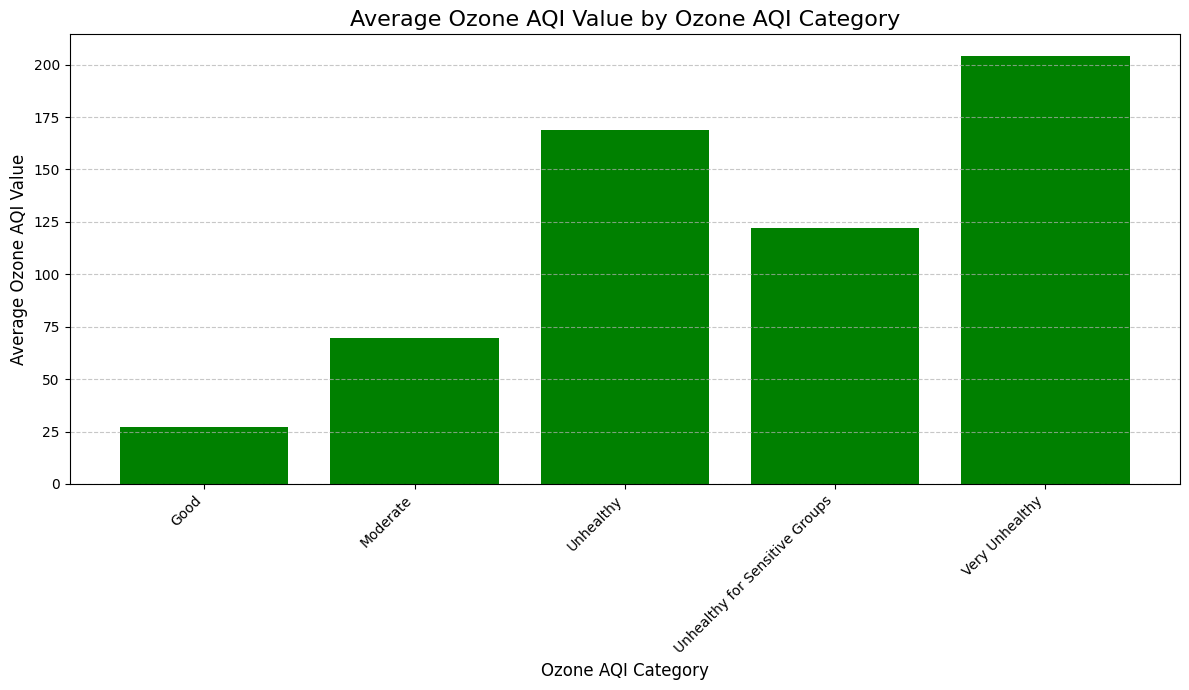

In [17]:
ozone_by_ozone_category = data.groupby('Ozone_AQI_Category')['Ozone_AQI_Value'].mean().reset_index()

plt.figure(figsize=(12, 7))
bars = plt.bar(ozone_by_ozone_category['Ozone_AQI_Category'], ozone_by_ozone_category['Ozone_AQI_Value'], color='green')

plt.title('Average Ozone AQI Value by Ozone AQI Category', fontsize=16)
plt.xlabel('Ozone AQI Category', fontsize=12)
plt.ylabel('Average Ozone AQI Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Graph 5

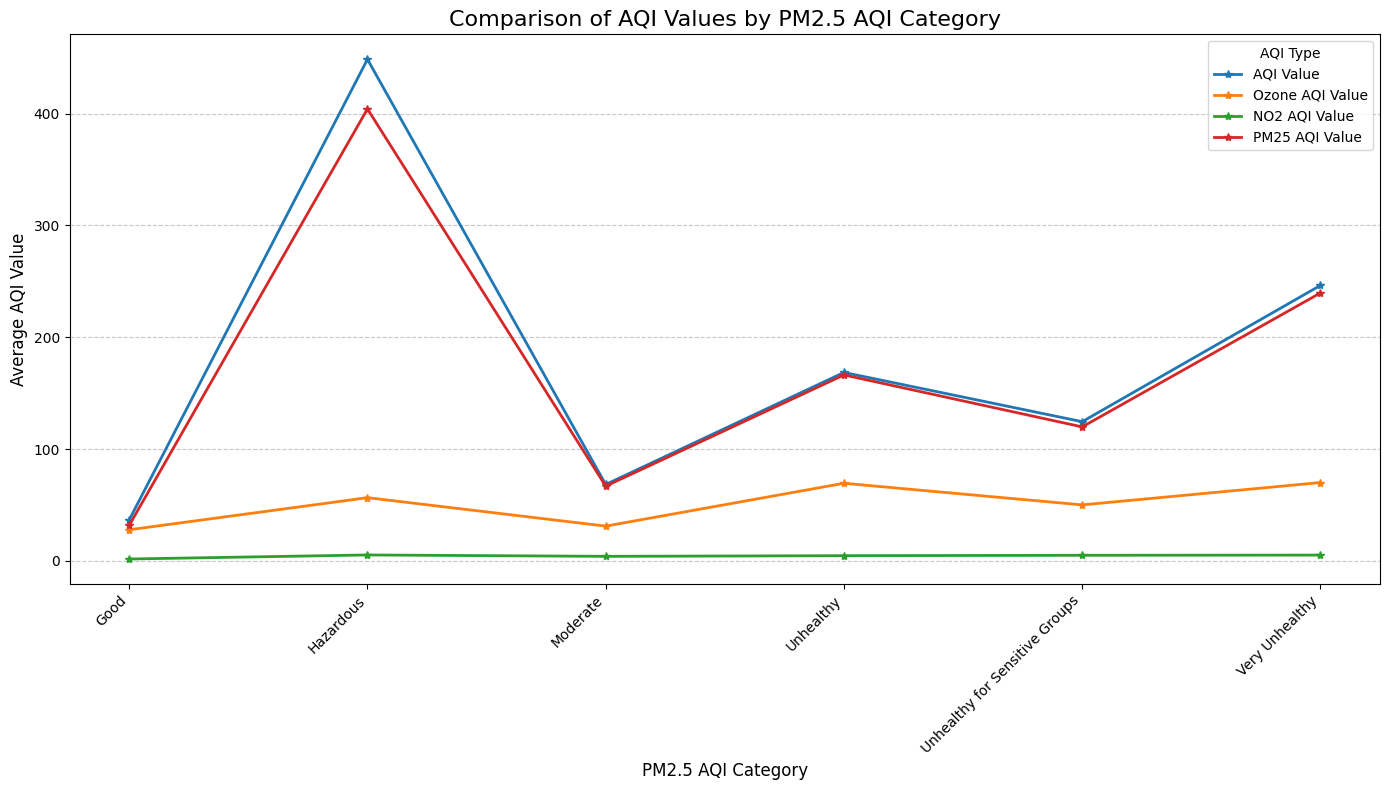

In [8]:
# Compare AQI values based on PM2.5 AQI Category
pm25_comparison = data.groupby('PM25_AQI_Category').agg({
    'AQI_Value': 'mean',
    'Ozone_AQI_Value': 'mean',
    'NO2_AQI_Value': 'mean',
    'PM25_AQI_Value': 'mean'
}).reset_index()

plt.figure(figsize=(14, 8))
# Plot each AQI value type
plt.plot(pm25_comparison['PM25_AQI_Category'], pm25_comparison['AQI_Value'],linewidth=2,marker='*', label='AQI Value')
plt.plot(pm25_comparison['PM25_AQI_Category'], pm25_comparison['Ozone_AQI_Value'],linewidth=2,marker='*', label='Ozone AQI Value')
plt.plot(pm25_comparison['PM25_AQI_Category'], pm25_comparison['NO2_AQI_Value'], linewidth=2, marker='*',label='NO2 AQI Value')
plt.plot(pm25_comparison['PM25_AQI_Category'], pm25_comparison['PM25_AQI_Value'], linewidth=2,marker='*', label='PM25 AQI Value')  # Removed vjust

plt.title('Comparison of AQI Values by PM2.5 AQI Category', fontsize=16)
plt.xlabel('PM2.5 AQI Category', fontsize=12)
plt.ylabel('Average AQI Value', fontsize=12)
plt.legend(title='AQI Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Graph 6

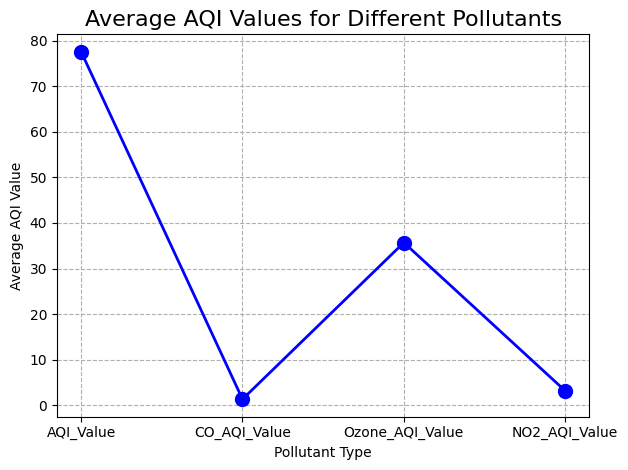

In [20]:
avg_values = {
    'AQI_Value': data['AQI_Value'].mean(),
    'CO_AQI_Value': data['CO_AQI_Value'].mean(),
    'Ozone_AQI_Value': data['Ozone_AQI_Value'].mean(),
    'NO2_AQI_Value': data['NO2_AQI_Value'].mean()
}
# Create a DataFrame for plotting
avg_df = pd.DataFrame({
    'Pollutant': list(avg_values.keys()),
    'Average_Value': list(avg_values.values())
})
# Create a line graph
plt.plot(avg_df['Pollutant'], avg_df['Average_Value'], 
         color='blue', marker='o', markersize=10, linewidth=2)

plt.title('Average AQI Values for Different Pollutants', fontsize=16)
plt.xlabel('Pollutant Type')
plt.ylabel('Average AQI Value')
plt.grid(True, linestyle='--')

plt.tight_layout()
plt.show()



# Graph 7 

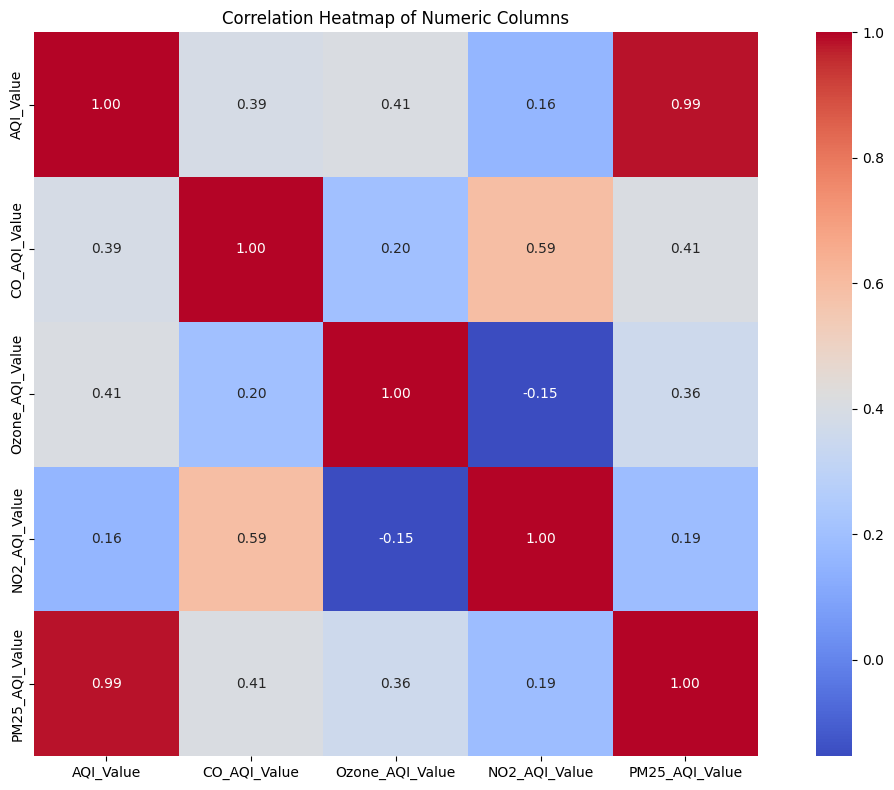

In [11]:
numeric_df = data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()


In [12]:
#Graph 8  Scatter plot of AQI Value vs PM2.5 AQI Value and AQI Value vs CO AQI Value to show the relation b/w them how much they relate to each other

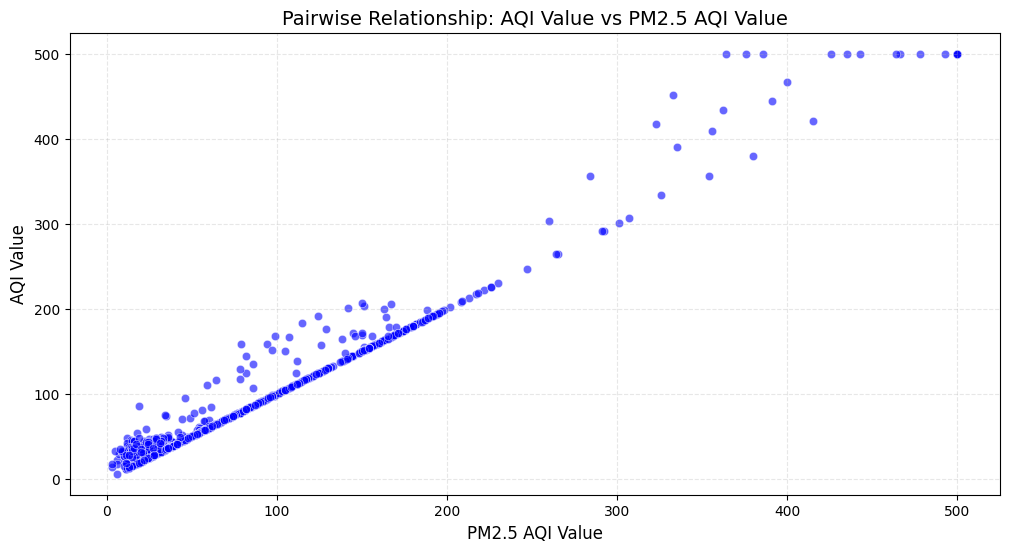

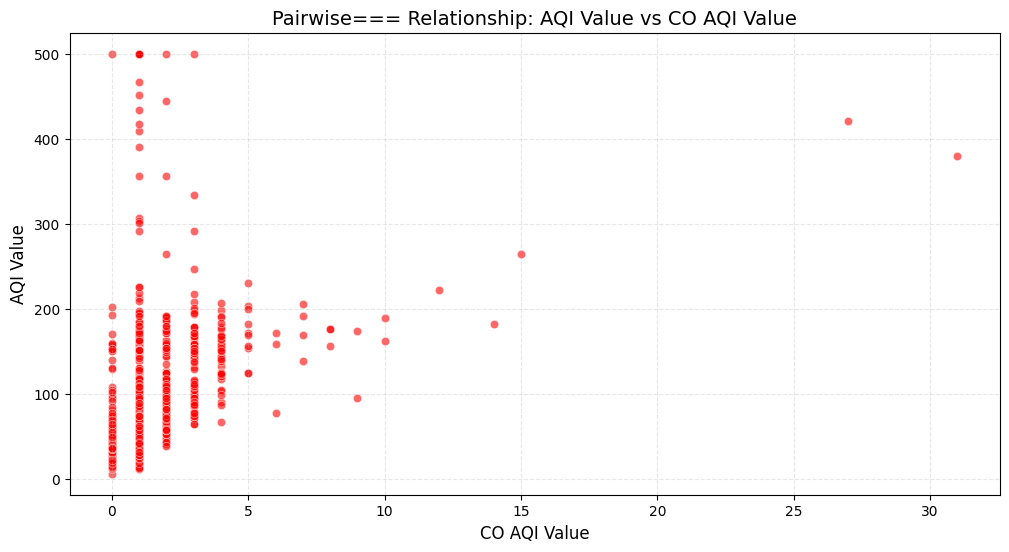

In [13]:
# Ensure columns exist
required_cols = ['AQI_Value', 'PM25_AQI_Value', 'CO_AQI_Value']
missing_cols = [col for col in required_cols if col not in data.columns]
if missing_cols:
    raise KeyError(f"Missing columns: {missing_cols}. Available columns: {list(data.columns)}")

clean_data = data[required_cols].dropna()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=clean_data, x='PM25_AQI_Value', y='AQI_Value', color='blue', alpha=0.6)
plt.title('Pairwise Relationship: AQI Value vs PM2.5 AQI Value', fontsize=14)
plt.xlabel('PM2.5 AQI Value', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.grid(linestyle='--', alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=clean_data, x='CO_AQI_Value', y='AQI_Value', color='red', alpha=0.6)
plt.title('Pairwise=== Relationship: AQI Value vs CO AQI Value', fontsize=14)
plt.xlabel('CO AQI Value', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.grid(linestyle='--', alpha=0.3)
plt.show()
